1 Gradient Descent and Variants - 1 [4 Points]
Consider the Rosenbrock function f(x, y) = x^2 + 100(y − x^2)^2, which is used to
benchmark optimization algorithms and the following variant admits a global minimum at (0, 0)T. Use random initialization of the parameters

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function
def rosenbrock(x, y):
    return x**2 + 100*(y - x**2)**2

# Define the gradient of the Rosenbrock function
def gradient_rosenbrock(x, y):
    df_dx = 2*x - 400*x*(y - x**2)
    df_dy = 200*(y - x**2)
    return np.array([df_dx, df_dy])

# Set the initial point and hyperparameters
initial_point = np.array([2.0, 2.0])  # You can start with a random point
learning_rate = 0.001  # Constant step size
max_iterations = 10000
tolerance = 1e-3  # Convergence criterion

• Run gradient descent with constant step size to minimize f(x, y). Show
contour plot of the function. After every update, using arrow show the
movement in the contour plots. Do it till convergence. [1 Point]

Converged after 5548 iterations.


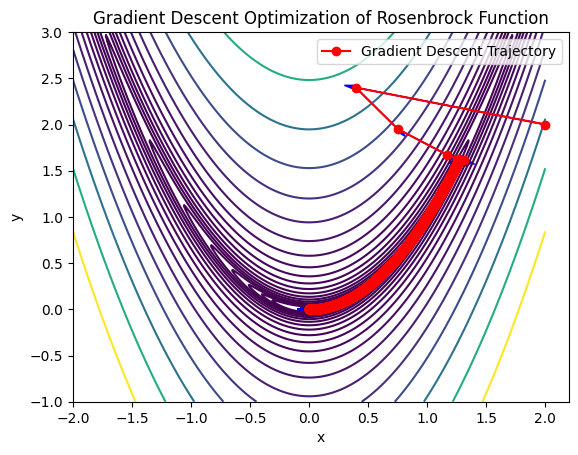

In [12]:
# Initialize lists to store the trajectory for plotting
x_trajectory = []
y_trajectory = []

# Gradient descent optimization
current_point = initial_point
for iteration in range(max_iterations):
    x_trajectory.append(current_point[0])
    y_trajectory.append(current_point[1])
    
    gradient = gradient_rosenbrock(current_point[0], current_point[1])
    current_point = current_point - learning_rate * gradient
    
    # Check for convergence
    if np.linalg.norm(gradient) < tolerance:
        print(f"Converged after {iteration + 1} iterations.")
        break

# Create a mesh grid for contour plot
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(X, Y)

# Plot the contour of the Rosenbrock function
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20))
plt.xlabel('x')
plt.ylabel('y')

# Plot the trajectory of gradient descent
plt.plot(x_trajectory, y_trajectory, '-o', color='red', label='Gradient Descent Trajectory')

# Add arrows to indicate movement
for i in range(1, len(x_trajectory)):
    plt.arrow(x_trajectory[i-1], y_trajectory[i-1], x_trajectory[i] - x_trajectory[i-1], y_trajectory[i] - y_trajectory[i-1], 
              head_width=0.05, head_length=0.1, fc='blue', ec='blue')

plt.legend()
plt.title('Gradient Descent Optimization of Rosenbrock Function')
plt.show()


• Use gradient descent with Polyak’s momentum method to minimize f(x, y).
Show contour plot of the function. After every update, using arrow show
the movement in the contour plots. Do it till convergence. [1 Point]

Converged after 266 iterations.


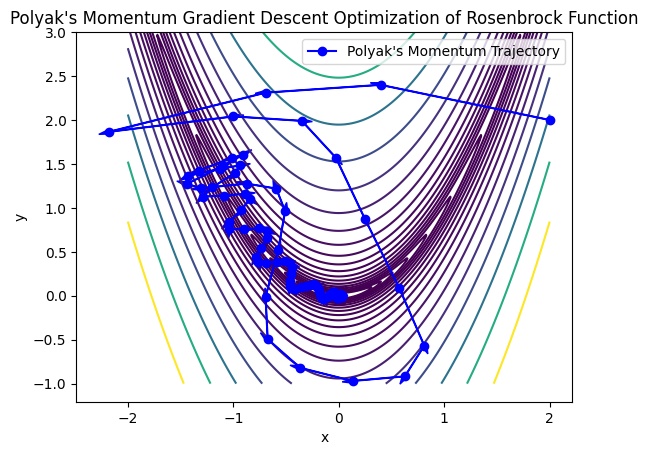

In [13]:
momentum=0.9
# Initialize lists to store the trajectory for plotting
x_trajectory = []
y_trajectory = []

# Initialize the momentum term
momentum_term = np.zeros(2)

# Gradient descent optimization with Polyak's Momentum
current_point = initial_point
for iteration in range(max_iterations):
    x_trajectory.append(current_point[0])
    y_trajectory.append(current_point[1])
    
    gradient = gradient_rosenbrock(current_point[0], current_point[1])
    
    # Update the momentum term
    momentum_term = momentum * momentum_term + learning_rate * gradient
    
    # Update the current point
    current_point = current_point - momentum_term
    
    # Check for convergence
    if np.linalg.norm(gradient) < tolerance:
        print(f"Converged after {iteration + 1} iterations.")
        break

# Create a mesh grid for contour plot
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(X, Y)

# Plot the contour of the Rosenbrock function
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20))
plt.xlabel('x')
plt.ylabel('y')

# Plot the trajectory of Polyak's Momentum Gradient Descent
plt.plot(x_trajectory, y_trajectory, '-o', color='blue', label="Polyak's Momentum Trajectory")

# Add arrows to indicate movement
for i in range(1, len(x_trajectory)):
    plt.arrow(x_trajectory[i-1], y_trajectory[i-1], x_trajectory[i] - x_trajectory[i-1], y_trajectory[i] - y_trajectory[i-1], 
              head_width=0.05, head_length=0.1, fc='blue', ec='blue')

plt.legend()
plt.title("Polyak's Momentum Gradient Descent Optimization of Rosenbrock Function")
plt.show()

• Minimize f(x, y) using Nesterov accelerated gradient descent. Show contour plot of the function. After every update, using arrow show the movement in the contour plots. Do it till convergence. [1 Point]

Converged after 239 iterations.


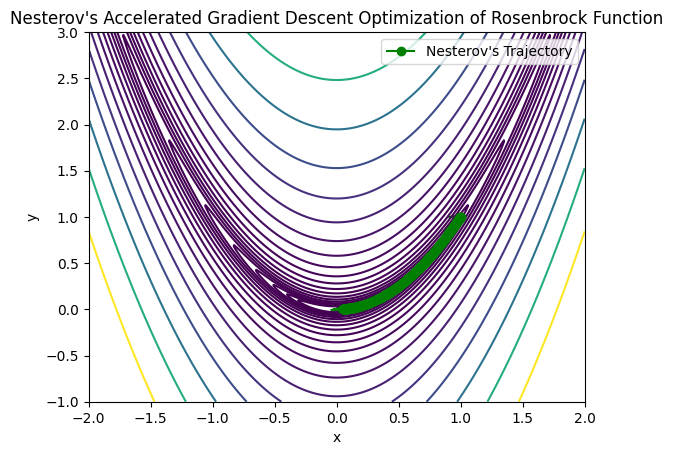

In [22]:
tolerance=1e-1
# Initialize lists to store the trajectory for plotting
x_trajectory = []
y_trajectory = []

# Initialize the velocity term
velocity = np.zeros(2)

# Nesterov Accelerated Gradient Descent optimization
current_point = np.array([1,1])
for iteration in range(max_iterations):
    x_trajectory.append(current_point[0])
    y_trajectory.append(current_point[1])
    
    # Calculate the gradient at the lookahead point
    lookahead_point = current_point - momentum * velocity
    gradient = gradient_rosenbrock(lookahead_point[0], lookahead_point[1])
    
    # Update the velocity term
    velocity = (momentum * velocity) + (learning_rate * gradient)
    
    # Update the current point
    current_point = current_point - velocity
    
    # Check for convergence
    if np.linalg.norm(gradient) < tolerance:
        print(f"Converged after {iteration + 1} iterations.")
        break

# Create a mesh grid for contour plot
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(X, Y)

# Plot the contour of the Rosenbrock function
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20))
plt.xlabel('x')
plt.ylabel('y')

# Plot the trajectory of Nesterov Accelerated Gradient Descent
plt.plot(x_trajectory, y_trajectory, '-o', color='green', label="Nesterov's Trajectory")

# Add arrows to indicate movement
for i in range(1, len(x_trajectory)):
    plt.arrow(x_trajectory[i-1], y_trajectory[i-1], x_trajectory[i] - x_trajectory[i-1], y_trajectory[i] - y_trajectory[i-1], 
              head_width=0.05, head_length=0.1, fc='green', ec='green')

plt.legend()
plt.title("Nesterov's Accelerated Gradient Descent Optimization of Rosenbrock Function")
plt.show()

• Minimize f(x, y) using Adam optimizer. Show contour plot of the function. After every update, using arrow show the movement in the contour
plots. Do it till convergence. [1 Point]

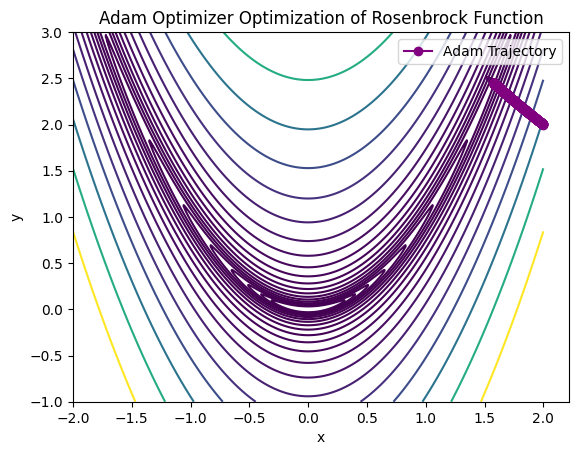

In [23]:
# Set the initial point and hyperparameters
initial_point = np.array([2.0, 2.0])  # You can start with a random point
learning_rate = 0.001  # Step size
beta1 = 0.9  # Exponential decay rate for the first moment estimate
beta2 = 0.999  # Exponential decay rate for the second moment estimate
epsilon = 1e-8  # Small constant to prevent division by zero
max_iterations = 1000
tolerance = 1e-6  # Convergence criterion

# Initialize lists to store the trajectory for plotting
x_trajectory = []
y_trajectory = []

# Initialize moments and square moments
moment1 = np.zeros(2)
moment2 = np.zeros(2)

# Initialize time step
t = 0

# Adam optimizer
current_point = initial_point
for iteration in range(max_iterations):
    x_trajectory.append(current_point[0])
    y_trajectory.append(current_point[1])
    
    gradient = gradient_rosenbrock(current_point[0], current_point[1])
    
    # Update time step
    t += 1
    
    # Update moments
    moment1 = beta1 * moment1 + (1 - beta1) * gradient
    moment2 = beta2 * moment2 + (1 - beta2) * gradient**2
    
    # Correct for bias
    moment1_corrected = moment1 / (1 - beta1**t)
    moment2_corrected = moment2 / (1 - beta2**t)
    
    # Update current point
    current_point -= learning_rate * moment1_corrected / (np.sqrt(moment2_corrected) + epsilon)
    
    # Check for convergence
    if np.linalg.norm(gradient) < tolerance:
        print(f"Converged after {iteration + 1} iterations.")
        break

# Create a mesh grid for contour plot
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(X, Y)

# Plot the contour of the Rosenbrock function
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20))
plt.xlabel('x')
plt.ylabel('y')

# Plot the trajectory of Adam optimizer
plt.plot(x_trajectory, y_trajectory, '-o', color='purple', label="Adam Trajectory")

# Add arrows to indicate movement
for i in range(1, len(x_trajectory)):
    plt.arrow(x_trajectory[i-1], y_trajectory[i-1], x_trajectory[i] - x_trajectory[i-1], y_trajectory[i] - y_trajectory[i-1], 
              head_width=0.05, head_length=0.1, fc='purple', ec='purple')

plt.legend()
plt.title("Adam Optimizer Optimization of Rosenbrock Function")
plt.show()

Consider the following function
f(x, y) = 50/9(x^2 + y^2)^3 −209/18(x^2 + y^2)^2 +59/9(x^2 + y^2).
This function has global minimum at (0, 0)T and local minima at x^2 + y^2 = 1.
Consider minimizing f(x, y) using the methods below. Use random initialization of the parameters.

In [4]:
# Define the function to minimize
def f(x, y):
    return (50/9)*(x**2 + y**2)**3 - (209/18)*(x**2 + y**2)**2 + (59/9)*(x**2 + y**2)

# Define the gradient of the function
def gradient(x, y):
    df_dx = (100/3)*x*(x**2 + y**2)**2 - (209/9)*x*(x**2 + y**2) + (59/9)*x
    df_dy = (100/3)*y*(x**2 + y**2)**2 - (209/9)*y*(x**2 + y**2) + (59/9)*y
    return np.array([df_dx, df_dy])

Converged after 248 iterations.


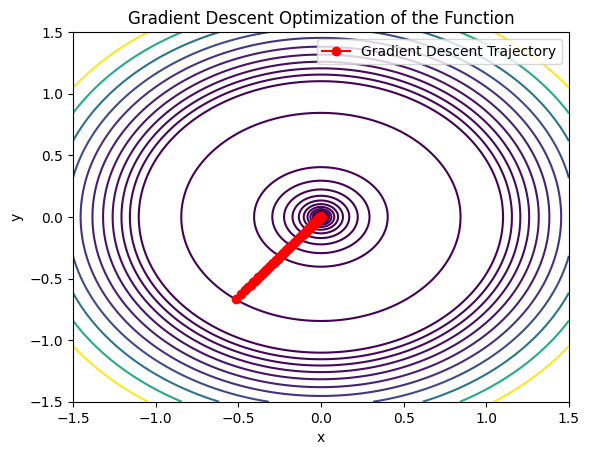

In [5]:
# Set initial point and hyperparameters
initial_point = np.random.rand(2) * 2 - 1  # Random initialization within [-1, 1]
learning_rate = 0.01
max_iterations = 1000
tolerance = 1e-6

# Initialize lists to store the trajectory for plotting
x_trajectory = []
y_trajectory = []

# Gradient Descent optimization
current_point = initial_point
for iteration in range(max_iterations):
    x_trajectory.append(current_point[0])
    y_trajectory.append(current_point[1])
    
    grad = gradient(current_point[0], current_point[1])
    current_point = current_point - learning_rate * grad
    
    # Check for convergence
    if np.linalg.norm(grad) < tolerance:
        print(f"Converged after {iteration + 1} iterations.")
        break

# Create a mesh grid for contour plot
x_range = np.linspace(-1.5, 1.5, 400)
y_range = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Plot the contour of the function
plt.contour(X, Y, Z, levels=np.logspace(-2, 2, 20))
plt.xlabel('x')
plt.ylabel('y')

# Plot the trajectory of Gradient Descent
plt.plot(x_trajectory, y_trajectory, '-o', color='red', label='Gradient Descent Trajectory')

plt.legend()
plt.title('Gradient Descent Optimization of the Function')
plt.show()

Converged after 205 iterations.


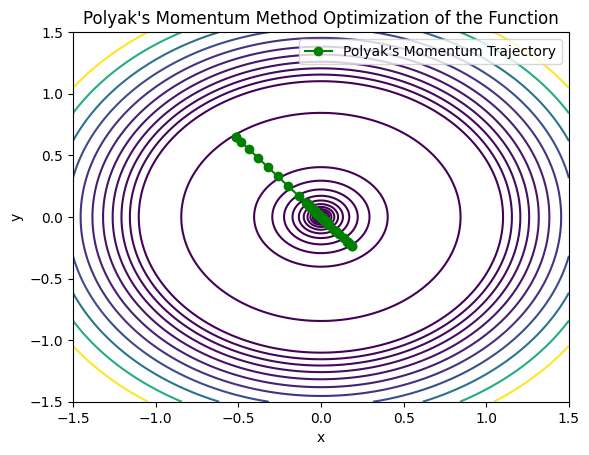

In [12]:
# Set initial point and hyperparameters
initial_point = np.random.rand(2) * 2 - 1  # Random initialization within [-1, 1]
learning_rate = 0.01
momentum = 0.9
max_iterations = 1000
tolerance = 1e-6

# Initialize lists to store the trajectory for plotting
x_trajectory = []
y_trajectory = []

# Initialize the momentum term
momentum_term = np.zeros(2)

# Polyak's Momentum Method
current_point = initial_point
for iteration in range(max_iterations):
    x_trajectory.append(current_point[0])
    y_trajectory.append(current_point[1])
    
    grad = gradient(current_point[0], current_point[1])
    
    # Update the lookahead point
    lookahead_point = current_point - momentum * momentum_term
    
    # Update the momentum term
    momentum_term = momentum * momentum_term + learning_rate * gradient(lookahead_point[0], lookahead_point[1])
    
    # Update the current point
    current_point = lookahead_point - learning_rate * momentum_term
    
    # Check for convergence
    if np.linalg.norm(grad) < tolerance:
        print(f"Converged after {iteration + 1} iterations.")
        break

# Create a mesh grid for contour plot
x_range = np.linspace(-1.5, 1.5, 400)
y_range = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Plot the contour of the function
plt.contour(X, Y, Z, levels=np.logspace(-2, 2, 20))
plt.xlabel('x')
plt.ylabel('y')

# Plot the trajectory of Polyak's Momentum Method
plt.plot(x_trajectory, y_trajectory, '-o', color='green', label="Polyak's Momentum Trajectory")

plt.legend()
plt.title("Polyak's Momentum Method Optimization of the Function")
plt.show()

Converged after 158 iterations.


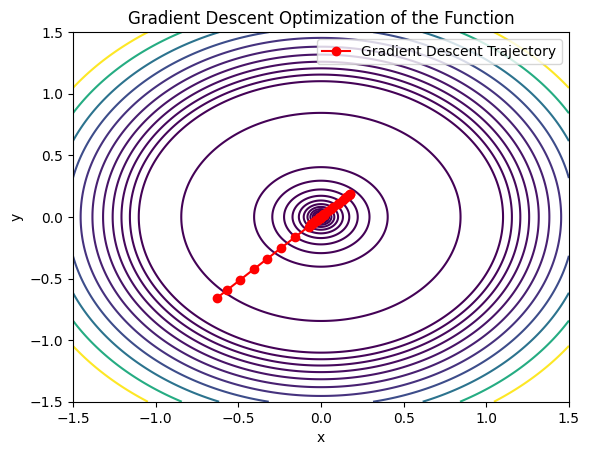

In [7]:
# Set initial point and hyperparameters
x_trajectory = []
y_trajectory = []
initial_point = np.random.rand(2) * 2 - 1  # Random initialization within [-1, 1]
learning_rate = 0.01
momentum = 0.9

# Initialize moments
momentum_term = np.zeros(2)

# Nesterov Accelerated Gradient Descent optimization
current_point = initial_point
for iteration in range(max_iterations):
    x_trajectory.append(current_point[0])
    y_trajectory.append(current_point[1])
    
    lookahead_point = current_point - momentum * momentum_term
    grad = gradient(lookahead_point[0], lookahead_point[1])
    
    momentum_term = momentum * momentum_term + learning_rate * grad
    current_point = current_point - momentum_term
    
    # Check for convergence
    if np.linalg.norm(grad) < tolerance:
        print(f"Converged after {iteration + 1} iterations.")
        break

# Create a mesh grid for contour plot
x_range = np.linspace(-1.5, 1.5, 400)
y_range = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Plot the contour of the function
plt.contour(X, Y, Z, levels=np.logspace(-2, 2, 20))
plt.xlabel('x')
plt.ylabel('y')

# Plot the trajectory of Gradient Descent
plt.plot(x_trajectory, y_trajectory, '-o', color='red', label='Gradient Descent Trajectory')

plt.legend()
plt.title('Gradient Descent Optimization of the Function')
plt.show()

Converged after 306 iterations.


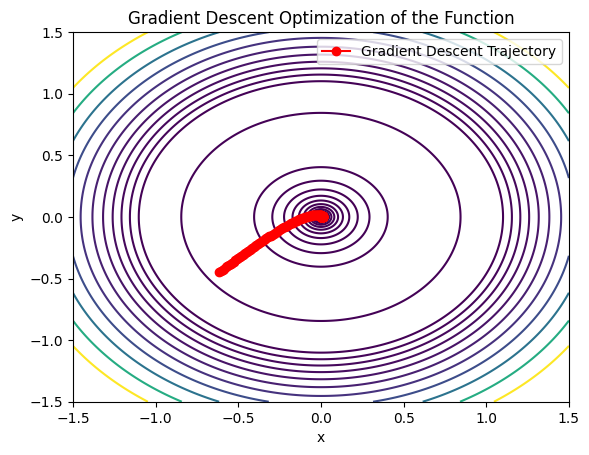

In [11]:
# Set initial point and hyperparameters
x_trajectory = []
y_trajectory = []
initial_point = np.random.rand(2) * 2 - 1  # Random initialization within [-1, 1]
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Initialize moments and time step
moment1 = np.zeros(2)
moment2 = np.zeros(2)
t = 0

# Adam optimizer
current_point = initial_point
for iteration in range(max_iterations):
    x_trajectory.append(current_point[0])
    y_trajectory.append(current_point[1])
    
    grad = gradient(current_point[0], current_point[1])
    t += 1
    
    moment1 = beta1 * moment1 + (1 - beta1) * grad
    moment2 = beta2 * moment2 + (1 - beta2) * grad**2
    
    moment1_corrected = moment1 / (1 - beta1**t)
    moment2_corrected = moment2 / (1 - beta2**t)
    
    current_point -= learning_rate * moment1_corrected / (np.sqrt(moment2_corrected) + epsilon)
    
    # Check for convergence
    if np.linalg.norm(grad) < tolerance:
        print(f"Converged after {iteration + 1} iterations.")
        break

# Create a mesh grid for contour plot
x_range = np.linspace(-1.5, 1.5, 400)
y_range = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Plot the contour of the function
plt.contour(X, Y, Z, levels=np.logspace(-2, 2, 20))
plt.xlabel('x')
plt.ylabel('y')

# Plot the trajectory of Gradient Descent
plt.plot(x_trajectory, y_trajectory, '-o', color='red', label='Gradient Descent Trajectory')

plt.legend()
plt.title('Gradient Descent Optimization of the Function')
plt.show()